# Import分はまとめる

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np

## クラスタリング

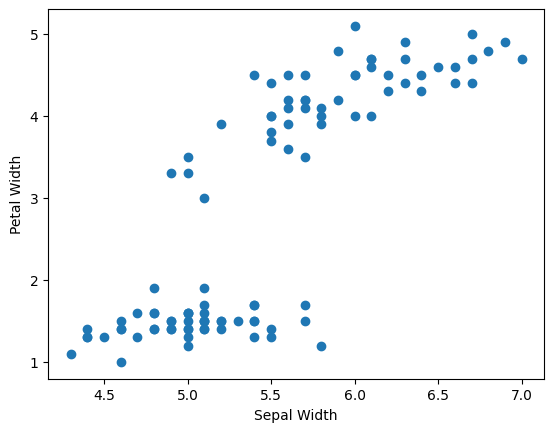

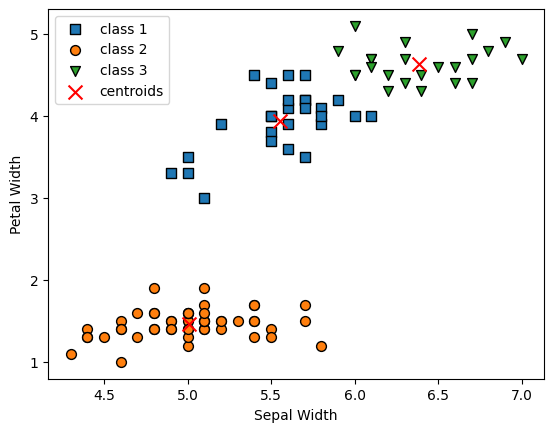

In [2]:
# irisのデータセットを読み込む
iris = load_iris()
X, y = iris.data[:100,[0,2]], iris.target[:100]

# dataを散布図でプロットする
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel("Sepal Width")
ax.set_ylabel("Petal Width")
plt.show()
km = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=123)
y_km = km.fit_predict(X)
fig, ax = plt.subplots()

# クラスターごとの散布図
for i, marker, label in zip(range(3), ['s', 'o', 'v'], ['class 1', 'class 2', 'class 3']):
    ax.scatter(X[y_km == i, 0], X[y_km == i, 1], s=50, edgecolor='black', marker=marker, label=label)

# クラスター中心点のプロット
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, marker='x', color='red', label='centroids')

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
ax.legend()
plt.show()


In [14]:
# 凝縮型の階層的クラスタリングのインスタンスを生成
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

# クラスタリングを実行し、各クラスを表示
labels = ac.fit_predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0])

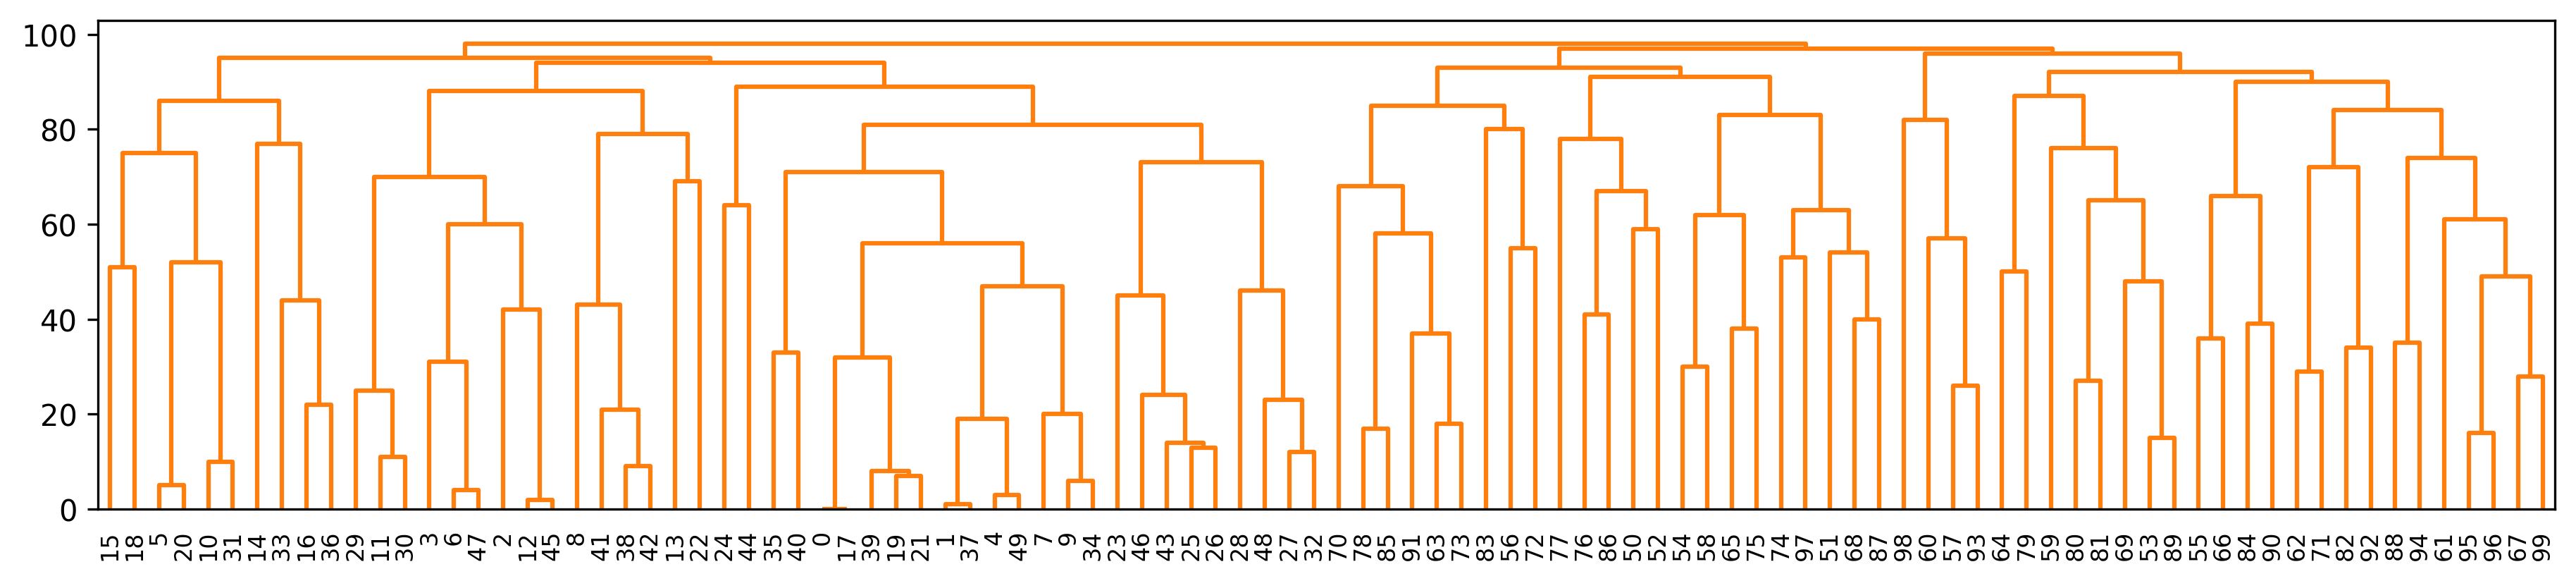

In [17]:
# 子クラスタとの関係を抽出
children = ac.children_
# クラスタ間の距離を抽出
distance = np.arange(children.shape[0])
# 各データの観測番号
no_of_observations = np.arange(2, children.shape[0]+2)
# 子クラスタ、クラスタ間の距離、観測番号を列方向に結合
linkage_matrix = np.hstack((children,distance.reshape(-1, 1),no_of_observations.reshape(-1, 1))).astype(float)
# 樹形図をプロット
fig, ax = plt.subplots(figsize=(15,3), dpi=300)
dendrogram(linkage_matrix,labels=np.arange(100), leaf_font_size=8,color_threshold=np.inf)
plt.show()